In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [62]:
df=pd.read_csv('EasyVisa.csv')

In [63]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [64]:
df.shape

(25480, 12)

In [65]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [67]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [68]:
categorical_columns=df.select_dtypes([np.object_]).columns.to_list()

In [69]:
len(categorical_columns)

9

In [70]:
for col in categorical_columns[:5]:
    if col!='case_id':
        print(df[col].value_counts(normalize=True)*100)
        print('---------------------------------------')
    

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------------------


In [71]:
for col in categorical_columns[5:]:
    if col!='case_id':
        print(df[col].value_counts(normalize=True)*100)
        print('---------------------------------------')

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
---------------------------------------
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64
---------------------------------------
full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64
---------------------------------------
case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64
---------------------------------------


In [72]:
numerical_columns=df.select_dtypes(np.number).columns.to_list()

In [73]:
numerical_columns

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [74]:
len(numerical_columns)

3

In [75]:
df[numerical_columns].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


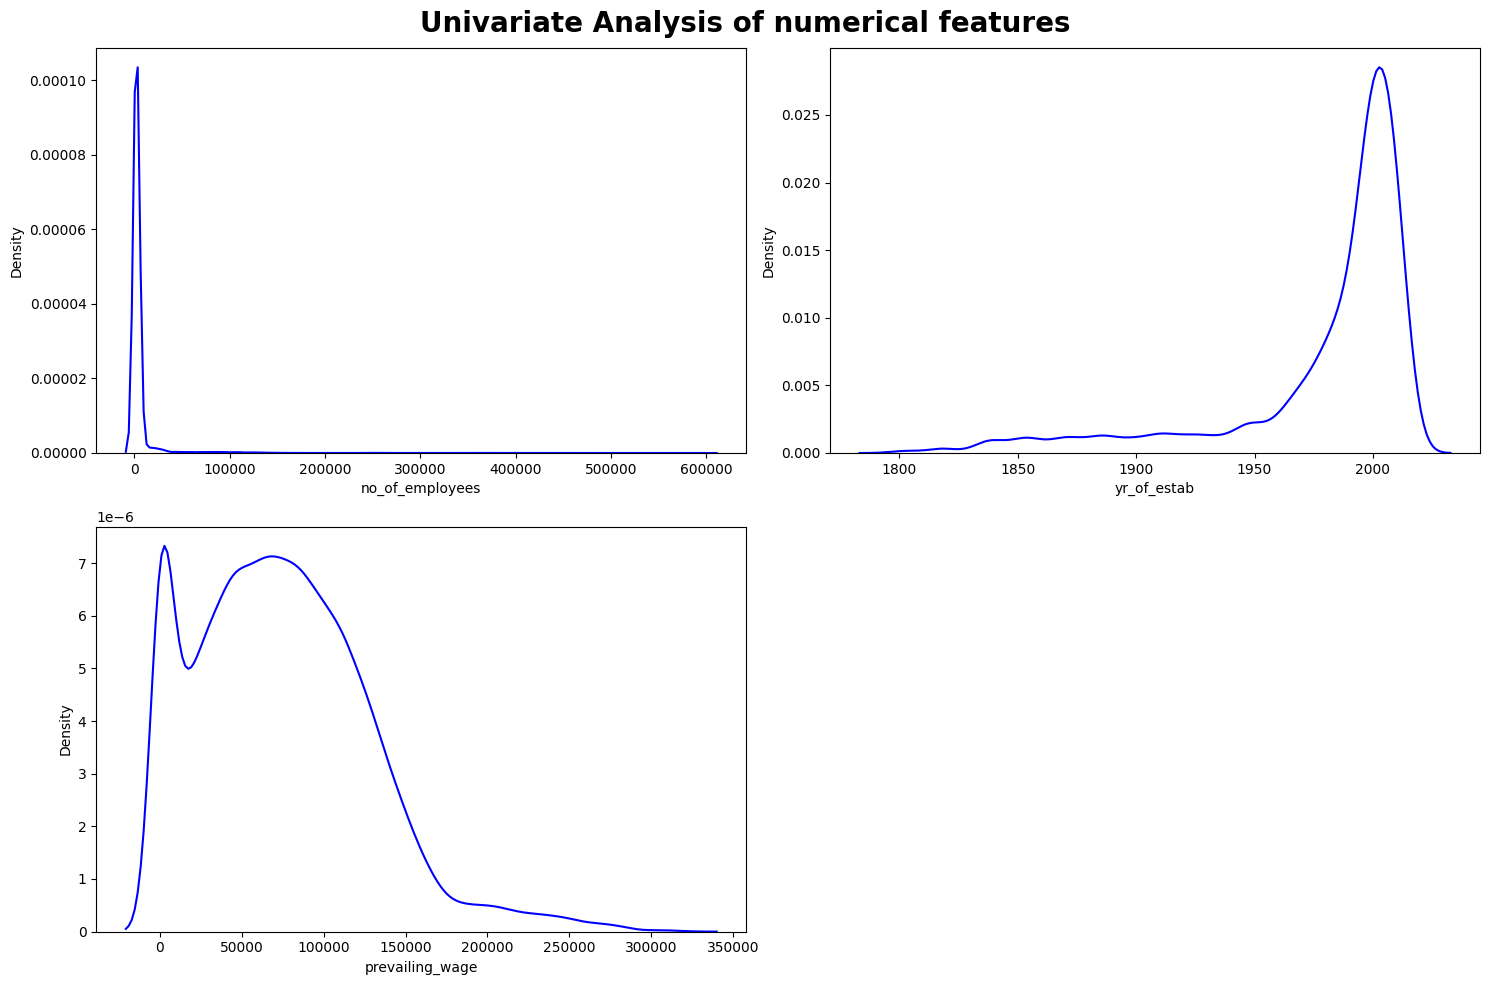

In [76]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of numerical features',fontsize=20,fontweight='bold')

for i in range(len(numerical_columns)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_columns[i]],color='blue')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

In [77]:
categorical_columns.remove('case_id')

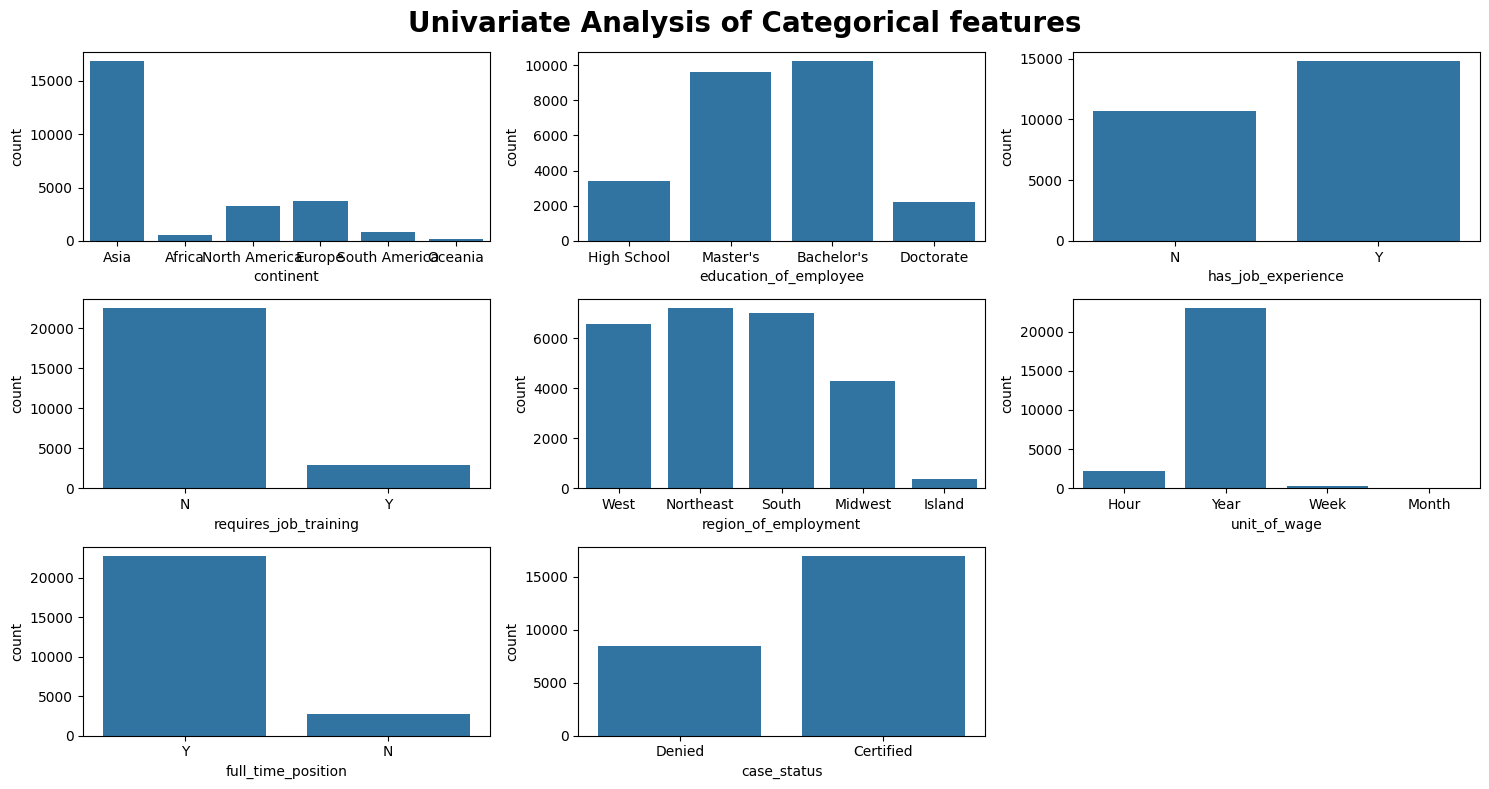

In [78]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical features',fontsize=20,fontweight='bold')

for i in range(len(categorical_columns)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.tight_layout()

In [79]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<=25]
continuous_features=[feature for feature in numerical_columns if len(df[feature].unique())>25]

In [80]:
discrete_features

[]

In [81]:
continuous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [82]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_columns:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
        chi2_test.append("reject null hypothesis")
    else:
        chi2_test.append('fail to reject null hypothesis')
result=pd.DataFrame(data=[categorical_columns,chi2_test]).T
result.columns=['column','hypothesis result']

In [83]:
result

,column,hypothesis result
0,continent,reject null hypothesis
1,education_of_employee,reject null hypothesis
2,has_job_experience,reject null hypothesis
3,requires_job_training,fail to reject null hypothesis
4,region_of_employment,reject null hypothesis
5,unit_of_wage,reject null hypothesis
6,full_time_position,reject null hypothesis
7,case_status,reject null hypothesis


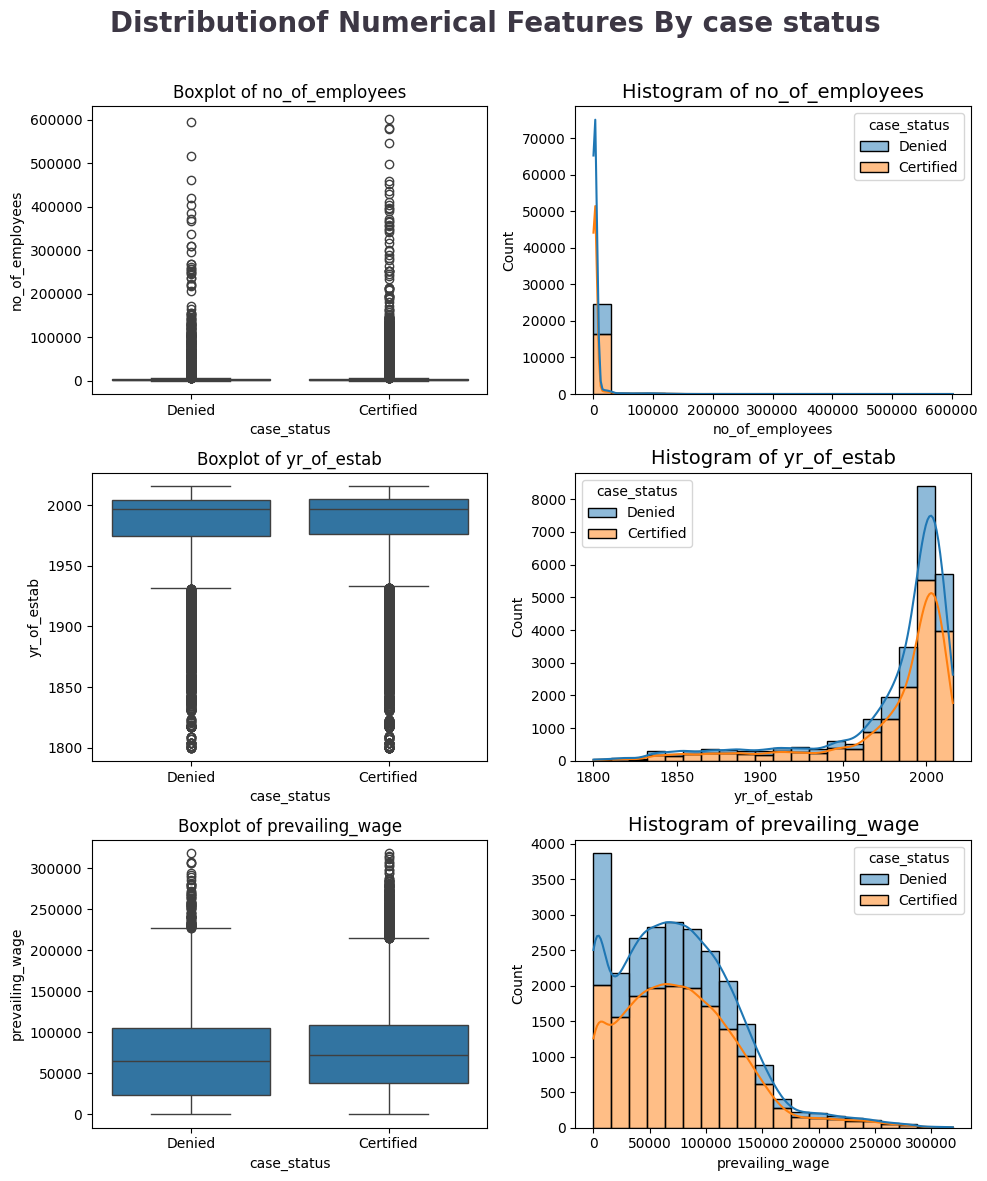

In [84]:
fig,ax=plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distributionof Numerical Features By case status',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i,col in enumerate(continuous_features):
    sns.boxplot(data=df,x='case_status',y=col,ax=ax[i,0])
    ax[i,0].set_title(f"Boxplot of {col}",fontsize=12)
    sns.histplot(data=df,x=col,hue='case_status',bins=20,kde=True,multiple='stack',ax=ax[i,1])
    ax[i,1].set_title(f"Histogram of {col}",fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)



In [85]:
percentage=df.case_status.value_counts(normalize=True)*100
labels=['Certified','Denied']

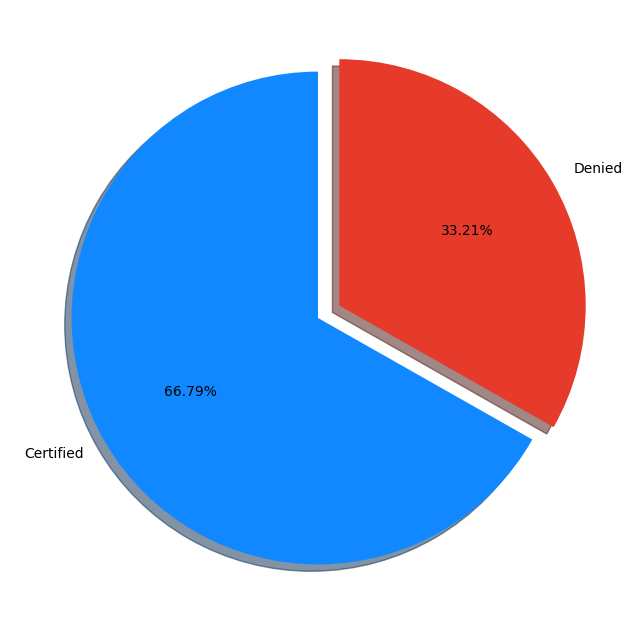

In [86]:
fig,ax=plt.subplots(figsize=(15,8))
explode=(0,0.1)
colors=["#1188ff",'#e63a2a']
ax.pie(percentage,labels=labels,startangle=90,autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.show()

In [87]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

Text(0.5, 1.0, 'Continent vs Visa Status')

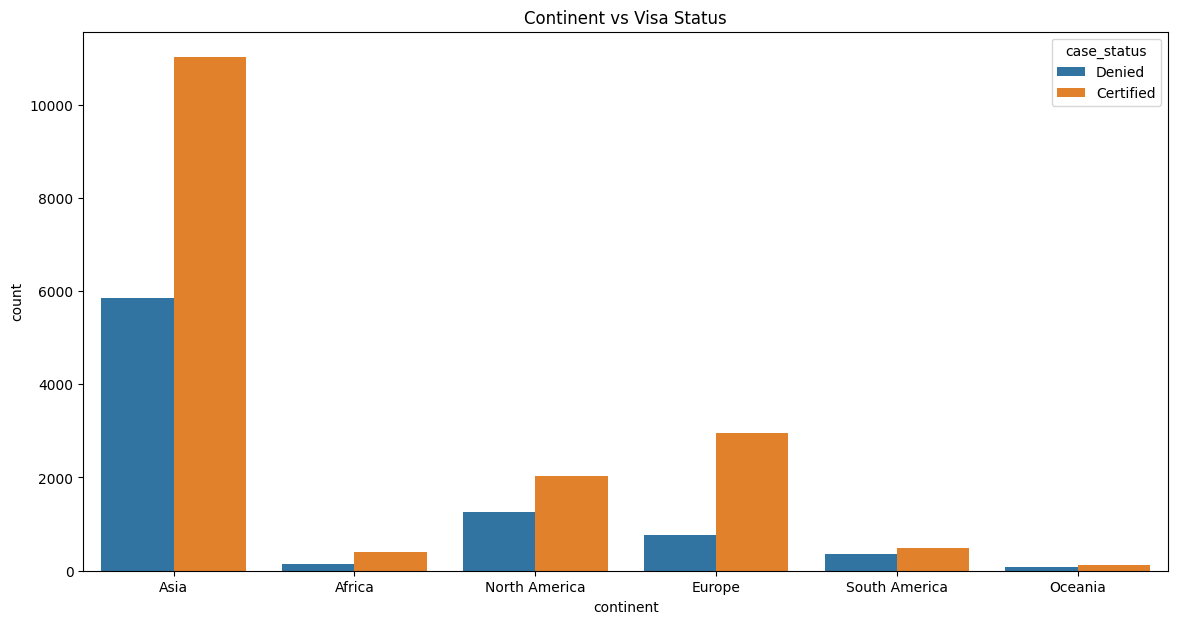

In [88]:
plt.figure(figsize=(14,7))
sns.countplot(x='continent',hue='case_status',data=df)
plt.title('Continent vs Visa Status')